## Problem 1

The data file prob-1.csv contains 320 datapoints, each of which is a point in  ℝ8 .

To make this file, I started with a 2-dimensional cloud of points  (𝑥0,𝑦0),…,(𝑥320,𝑦320)  in the shape of a happy face. I then appended 6 small random-ish numbers to each point  (𝑥𝑖,𝑦𝑖) , getting a point in  ℝ8 . For most of the points, the random numbers I appended were all much smaller than  |𝑥𝑖|  or  |𝑦𝑖| . So, for instance, maybe one of the resulting points was something like
(𝑥1,𝑦1,0.2351231,0.9539321,0.0048348,0.0083756,0.0048485,0.00171848),
 
with  𝑥1  and  𝑦1  being about 30 or 40 or so.

At this point I have a thin point cloud in  ℝ𝟠  in the shape of a happy face. The last thing that I did was to choose a random 8 by 8 orthogonal matrix  𝑀 , and to multiply each of the data points by  𝑀  (thereby randomly rotating the point cloud in  ℝ8 ; I used the same  𝑀  on all the points).

Show me as close to the original happy face image as you can.

Problem from Math 352 Class...

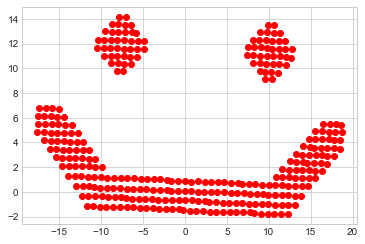

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv("prob-1.csv", names=["x1", "y1", "p1", "p2", "p3", "p4", "p5", "p6"])

# present data as an array/matrix
x1 = x["x1"]
y1 = x["y1"]
p1 = x["p1"]
p2 = x["p2"]
p3 = x["p3"]
p4 = x["p4"]
p5 = x["p5"]
p6 = x["p6"]

A = np.array([x1, y1, p1, p2, p3, p4, p5, p6])
A = A.T  # transpose so data appears correct 

# perform singular value decomposition
data = np.linalg.svd(A, full_matrices=True)
U = data[0]
S = data[1]
VT = data[2]

# check to make sure AV = US
V = VT.T
AV = np.matmul(A, V)
US = U[:, :8] * S
np.allclose(AV, US) 

# project data so we isolate the x and y pts
P = np.array([[1, 0], [0, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]])
PUS = np.matmul(US, P)

# get matrix VP
VP = np.matmul(V, P)

# multiply VP by some length-8 row input vector
aVPs = []
for row in A:
    aVP = np.matmul(row, VP)
    aVPs.append(aVP)
    
# plot data
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

x = np.array([aVPs[i][0] for i in range(len(aVPs))])
y = np.array([aVPs[i][1] for i in range(len(aVPs))])

# Plotting
plt.scatter(x, y,color='r',marker='o')
plt.show()